<a href="https://colab.research.google.com/github/sava-stew/Principles-of-Data-Science-Assignment1/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*File structure slightly differs from the case study found in notes. This is to allow the code to be ran in Colab without any backtracking.*

# **Frailty**

## **source**

### raw_data

In [19]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/sava-stew/Principles-of-Data-Science-Assignment1/refs/heads/main/frailty/data_raw/Frailty.csv')
df

,Height,Weight,Age,Grip Strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


### clean_data

In [20]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/sava-stew/Principles-of-Data-Science-Assignment1/refs/heads/main/frailty/data_raw/Frailty.csv')

clean_data = df.copy()

#omits participants that should have frailty based on grip strength alone
#grip strenth of < 20 should signify frailty in females
clean_data.drop((clean_data[(clean_data['Grip Strength'] < 20)].index), inplace = True)
clean_data

#to clean_data dataframe to seperate csv file
#clean_data.to_csv('clean_data.csv', index = False)

,Height,Weight,Age,Grip Strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
9,66.8,120,39,31,N


### analyze_data

In [21]:
import pandas as pd

#creates seperate datafeame for participants with frailty
indexYes = clean_data.copy()
indexYes.drop(indexYes[indexYes['Frailty'] == 'N'].index, inplace = True)

#creates seperate dataframe for participants withouth frailty
indexNo = clean_data.copy()
indexNo.drop(indexNo[indexNo['Frailty'] == 'Y'].index, inplace = True)

#finds average grip strength of those with frailty
meanYes =  indexYes['Grip Strength'].mean()

#finds average grip strength of those without frailty
meanNo = indexNo['Grip Strength'].mean()

file = open('results.txt', 'w')
file.write(f'Average grip strength of those with frailty: {meanYes}\n')
file.write(f'Average grip strength of those without frailty: {meanNo}\n')
file.close()

## **data_raw**

*   Height is recorded inches
*   Weight is recorded in pounds
*   Age is recorded in years
*   Grip Strength is recorded in kilograms
*   Frailty codes indicate if frailty was present in participant (Y) or not present (N), and was assessed qualitatively based on symptoms

In [22]:
df

,Height,Weight,Age,Grip Strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


## **data_clean**

In [23]:
clean_data

,Height,Weight,Age,Grip Strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
9,66.8,120,39,31,N


## **results**

In [24]:
file = open('results.txt', 'r')
print(file.read())

Average grip strength of those with frailty: 23.5
Average grip strength of those without frailty: 29.4



# **Student_Performance**

## **source**

### raw_data

In [25]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/sava-stew/Principles-of-Data-Science-Assignment1/refs/heads/main/student_performance/data_raw/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### clean_data

After review of the data in StudentsPerformance.csv, there is no need to clean the data. While there are rows of data where low or high test scores are found, it may be beneficial information based on what is being evaluated. Because of this, the data has been left as-is to account for all circumstances.

### analyze_data

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

#lunch_free_math_scores.png and lunch_standard_math_scores.png allow for easier analysis of it a participants lunch payment status has an impact on their math scores
#creates a histogram that represents the frequence of math scores for those with free/reduced lunch
lunchFree = df.copy()
lunchFree.drop(lunchFree[lunchFree['lunch'] == 'standard'].index, inplace = True)
lunchFree['math score'].plot.hist(title = 'Free/Reduced Lunch Math Scores', xlabel = 'Percentage', ylabel = 'Frequency', bins = 50)
plt.savefig('lunch_free_math_scores.png')
plt.close()

#creates a histogram that represents the frequency of math scores for those with standard lunch
lunchStandard = df.copy()
lunchStandard.drop(lunchStandard[lunchStandard['lunch'] == 'free/reduced'].index, inplace = True)
lunchStandard['math score'].plot.hist(title = 'Standard Lunch Math Scores', xlabel = 'Percentage', ylabel = 'Frequency', bins = 50)
plt.savefig('lunch_standard_math_scores.png')
plt.close()

#parentEd_on_writing_scores.png allows for easier analysis of if higher or lower average writing scores and correlated to different levels of parental education
#creates a bar graph that represents the correlation between writing scores and parental level of education
parentEd = df.groupby('parental level of education')
parentEd['writing score'].mean().plot.bar(title = 'Parent Education on Writing Scores', ylabel = 'Average Score')
plt.tight_layout()
plt.savefig('parentEd_on_writing_scores.png')
plt.close()

#test_scores_by_gender.png allows for easier analysis of if there is a trend in test score density due to gender across different subjects
#creates a series of density graphs that represent the density of different scores by gender
gender = df.groupby('gender')
plt.subplot(3, 1, 1)
gender['math score'].plot.kde(title = 'Math Scores by Gender', xlabel = 'Scores')
plt.subplot(3, 1, 2)
gender['reading score'].plot.kde(title = 'Reading Scores by Gender', xlabel = 'Scores')
plt.subplot(3, 1, 3)
gender['writing score'].plot.kde(title = 'Writing Scores by Gender', xlabel = 'Scores')
plt.legend()
plt.tight_layout()
plt.savefig('test_scores_by_gender.png')
plt.close()

#test_prep_on_averages.png allows for easier analysis of it there is a correlation between completed test prep and higher or lower score averages acorss subjects
#creates a bar graph that represents the correlation between test prep completion and average test scores across subjects
testPrep = df.groupby('test preparation course')
mathMean = testPrep['math score'].mean()
readingMean = testPrep['reading score'].mean()
writingMean = testPrep['writing score'].mean()
data = {'Math Average': mathMean, 'Reading Average': readingMean, 'Writing Average': writingMean}
averages = pd.DataFrame(data)
averages.plot.bar(title = 'Test Prep on Averages Scores', xlabel = 'test prep completion', ylabel = 'Average Score')
plt.tight_layout()
plt.savefig('test_prep_on_averages.png')
plt.close()

#parent_education_and_test_prep.png allows for easier analysis of if there is a correlation between parental education and completed test preparation
#creates bar graph that represents the frequence of correlation between parental education and completed test preparation
parentEd = df.groupby('parental level of education')
parentEdPrep = parentEd['test preparation course'].value_counts()
parentEdPrep.plot.bar(title = 'Parent Education and Test Prep', xlabel = 'Parental Education and Test Prep Completion')
plt.tight_layout()
plt.savefig('parent_education_and_test_prep.png')
plt.close()

## **data_raw**



*   Gender codes indicate if participant is 'female' or 'male'
*   Race/Ethnicity codes indicate if participant is within a specific race/ethinicity group, and does not directly state the participant's race/ethnicity
*   Parental Level of Education codes indicate if participant's parents have not completed high school (some high schol), have completed high school (high school), have not completed a college degree (some college), or have completed a degree (associate's degree, bachelor's degreen, master's degree)
*   Lunch codes indicate if participant recieves a 'free/reduced' lunch at school or a 'standard' lunch at school
*   Test Preparation Course indicates if a participant completed a test prep course (completed) or did not (none)
*   Math Score is recorded in percentages
*   Reading Score is recorded in percentages
*   Writing Score is recorded in percentages



In [26]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## **data_clean**

After review of the data in StudentsPerformance.csv, there is no need to clean the data. While there are rows of data where low or high test scores are found, it may be beneficial information based on what is being evaluated. Because of this, the data has been left as-is to account for all circumstances.

## **results**

In [40]:
from IPython.display import Image

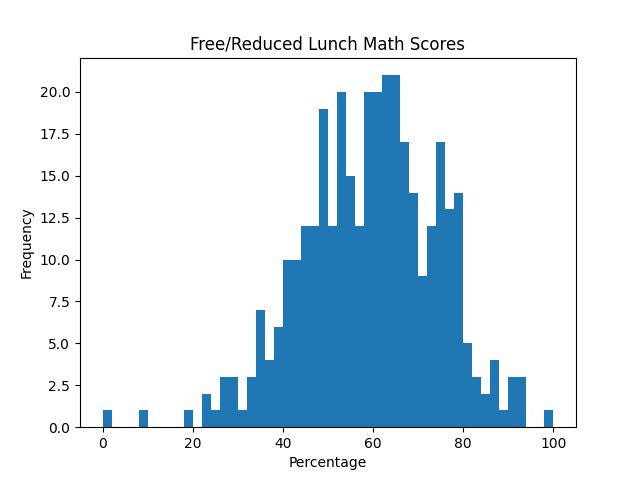

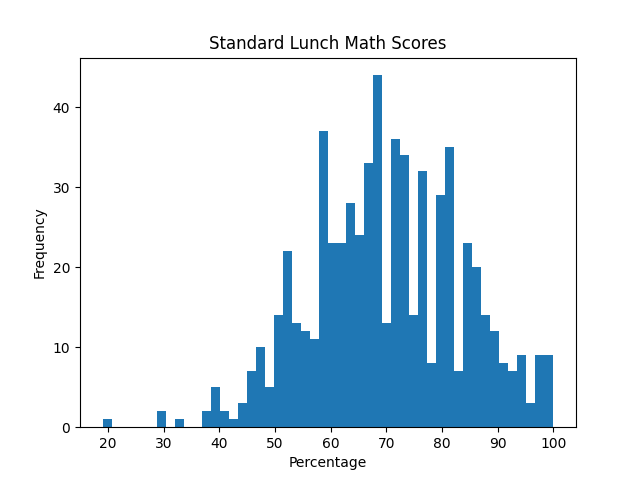

In [41]:
display(Image(filename = 'lunch_free_math_scores.png'))
display(Image(filename = 'lunch_standard_math_scores.png'))

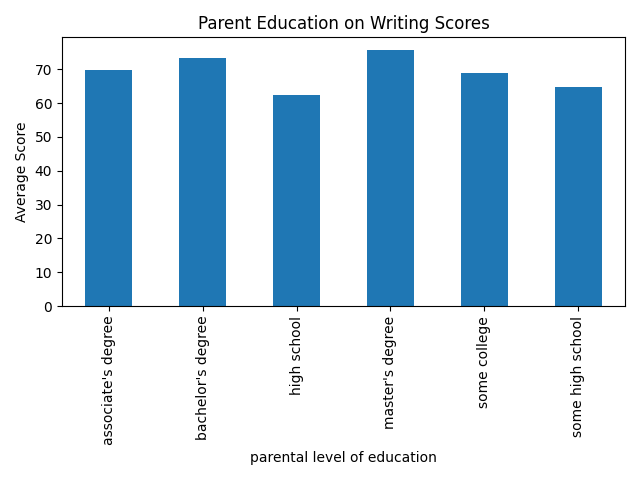

In [46]:
display(Image(filename = 'parentEd_on_writing_scores.png'))

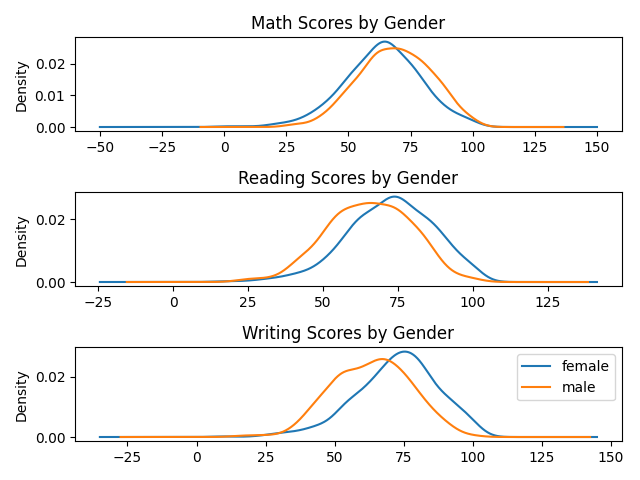

In [54]:
display(Image(filename = 'test_scores_by_gender.png'))

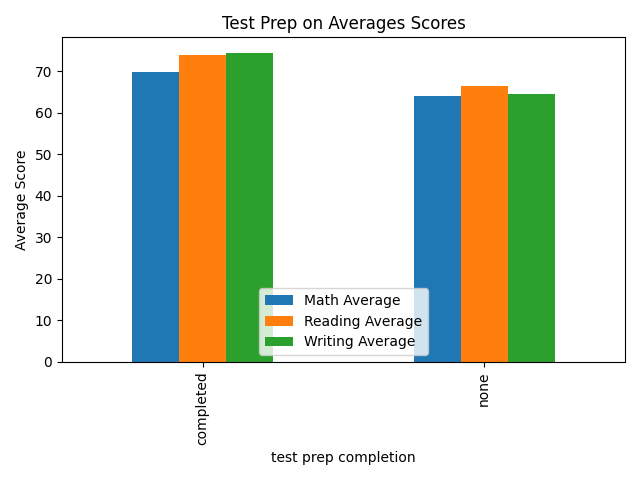

In [49]:
display(Image(filename = 'test_prep_on_averages.png'))

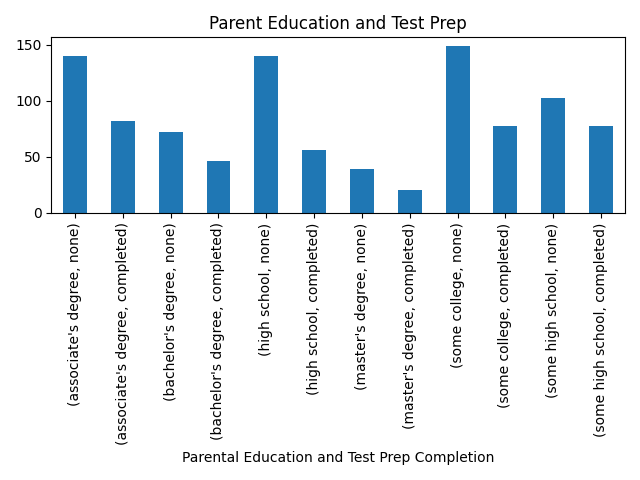

In [56]:
display(Image(filename = 'parent_education_and_test_prep.png'))